In [96]:
import pandas as pd
#Import Pittsburgh 2013 Weather CSV File
weather = pd.read_csv('C:\\datacamp\\04-MergingDataFrameswithPandas\\data\\pittsburgh2013.csv', index_col=['Date'], parse_dates = True)

#Separate the Mean Temp column and the Max Temp column
pmeantemp = weather[['Mean TemperatureF']]
pmaxtemp = weather[['Max TemperatureF']]

#Year Variable needed for later exerises and dictionary creation
year = ['Jan','Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#Find the mean temperature by quarter
Q1mean = pmeantemp.loc['2013-01-01':'2013-03-31'].mean().iloc[0]
Q2mean = pmeantemp.loc['2013-04-01':'2013-06-30'].mean().iloc[0]
Q3mean = pmeantemp.loc['2013-07-01':'2013-09-30'].mean().iloc[0]
Q4mean = pmeantemp.loc['2013-10-01':'2013-12-31'].mean().iloc[0]

#Create a  dictionary and convert to dataframe of quarterly mean temperatures
qmeandict = {'Month':['Jan','Apr','Jul','Oct'],'Mean TemperatureF':[Q1mean,Q2mean,Q3mean,Q4mean]}
w_mean = pd.DataFrame(qmeandict)
w_mean.to_csv('c:\\datacamp\\04-MergingDataFrameswithPandas\\data\\w_mean.csv')

#Create Weather1 DF that is the same as Quarterly Mean Temp DF for other exercises
weather1 = pd.DataFrame(qmeandict)

#Find the max temperature by quarter
Q1max = pmaxtemp.loc['2013-01-01':'2013-03-31'].max().iloc[0]
Q2max = pmaxtemp.loc['2013-04-01':'2013-06-30'].max().iloc[0]
Q3max = pmaxtemp.loc['2013-07-01':'2013-09-30'].max().iloc[0]
Q4max = pmaxtemp.loc['2013-10-01':'2013-12-31'].max().iloc[0]

#Create a  dictionary and convert to dataframe of quarterly max temperatures
qmaxdict = {'Month':['Jan','Apr','Jul','Oct'],'Max TemperatureF':[Q1max,Q2max,Q3max,Q4max]}
w_max = pd.DataFrame(qmaxdict)
w_max.to_csv('c:\\datacamp\\04-MergingDataFrameswithPandas\\data\\w_max.csv')

#Find the mean temperature by month
Janmean = pmeantemp.loc['2013-01'].max().iloc[0]
Febmean = pmeantemp.loc['2013-02'].max().iloc[0]
Marmean = pmeantemp.loc['2013-03'].max().iloc[0]
Aprmean = pmeantemp.loc['2013-04'].max().iloc[0]
Maymean = pmeantemp.loc['2013-05'].max().iloc[0]
Junmean = pmeantemp.loc['2013-06'].max().iloc[0]
Julmean = pmeantemp.loc['2013-07'].max().iloc[0]
Augmean = pmeantemp.loc['2013-08'].max().iloc[0]
Sepmean = pmeantemp.loc['2013-09'].max().iloc[0]
Octmean = pmeantemp.loc['2013-10'].max().iloc[0]
Novmean = pmeantemp.loc['2013-11'].max().iloc[0]
Decmean = pmeantemp.loc['2013-12'].max().iloc[0]

#Create a  dictionary and convert to dataframe of monthly mean temperatures
mmeandict = {'Month':year,
'Mean TemperatureF':[Janmean, Febmean, Marmean, Aprmean, Maymean, Junmean, Julmean, Augmean, Sepmean, Octmean, Novmean, Decmean]}
monthly_mean_temp= pd.DataFrame(mmeandict)
monthly_mean_temp.to_csv('c:\\datacamp\\04-MergingDataFrameswithPandas\\data\\monthly_mean_temp.csv')


#Find the max temperature by month
Janmax = pmaxtemp.loc['2013-01'].max().iloc[0]
Febmax = pmaxtemp.loc['2013-02'].max().iloc[0]
Marmax = pmaxtemp.loc['2013-03'].max().iloc[0]
Aprmax = pmaxtemp.loc['2013-04'].max().iloc[0]
Maymax = pmaxtemp.loc['2013-05'].max().iloc[0]
Junmax = pmaxtemp.loc['2013-06'].max().iloc[0]
Julmax = pmaxtemp.loc['2013-07'].max().iloc[0]
Augmax = pmaxtemp.loc['2013-08'].max().iloc[0]
Sepmax = pmaxtemp.loc['2013-09'].max().iloc[0]
Octmax = pmaxtemp.loc['2013-10'].max().iloc[0]
Novmax = pmaxtemp.loc['2013-11'].max().iloc[0]
Decmax = pmaxtemp.loc['2013-12'].max().iloc[0]

#Create a  dictionary and convert to dataframe of monthly max temperatures
mmaxdict = {'Month':year,
'Max TemperatureF':[Janmax, Febmax, Marmax, Aprmax, Maymax, Junmax, Julmax, Augmax, Sepmax, Octmax, Novmax, Decmax]}
monthly_max_temp= pd.DataFrame(mmaxdict)
monthly_max_temp.to_csv('c:\\datacamp\\04-MergingDataFrameswithPandas\\data\\monthly_max_temp.csv')

#Import Baby Name Files with MultiIndex with levels name and gender
names_1981 = pd.read_csv('c:\\datacamp\\04-MergingDataFrameswithPandas\\data\\names1981.csv', header=None, names=['name','gender','count'], index_col=(0,1))
names_1881 = pd.read_csv('c:\\datacamp\\04-MergingDataFrameswithPandas\\data\\names1881.csv', header=None, names=['name','gender','count'], index_col=(0,1))

# Merging DataFrames with Pandas

## Chapter 1 - Preparing Data

### Reading Multiple Data Files
Generally data does not come as a DataFrame from the outset and you have to deal with text files, databases and spreadsheets. Let's first review how to read multiple files into a collection of DataFrames.

#### Tools for Pandas Data Import
The primary tool used for import is pd.read_csv(). This function accepts the file path to a comma separate file(CSV) as input: 
    dataframe = pd.read_csv('filepath')

Other data import tools provided by Pandas include:
    pd.read_excel()
    pd.read_html()
    pd.read_json()
    
#### Loading Separate Files
To load multiple files into DataFrames, with Pandas we need to create separate DataFrames. For example, below we call pd.read_csv() twice, first to import sales-jan-2015.csv into DF0 and second to import sales-feb-2015 into DF1.

In [ ]:
import pandas as pd

DF0 = pd.read_csv('sales-jan-2015')
DF1 = pd.read_csv('sales-feb-2015')

#### Using a Loop
It's generally more efficient to iterate over a collection of file names. First create a list with the path of each filename. Then initialize and empty list called DataFrames and then iterate through the list: filenames. With each iteration, we invoke .read_csv() to read a DataFrame from a file and append the resulting DataFrame to the list: DataFrames.

In [ ]:
filenames = ['sales-jan-2015.csv', 'sales-feb-2015.csv']
DataFrames = []

for f in filenames:
    DataFrames.append(pd.read_csv(f))

#### Using a Comprehension
We can also do the same using a list comprehension. Comprehensions are convenient Python construction for exactly this type of loop, where an empty list is appended to with each iteration.

In [ ]:
filenames = ['sales-jan-2015.csv', 'sales-feb-2015.csv']
DataFrames = [pd.read_csv(f) for f in filenames]

#### Using glob
When many file names have a similar pattern, the glob module from the Python standard library is very useful. First, start by importing the function glob from the built in glob module. Passing the pattern: 'sales*.csv' to glob will match any file name that matches the prefix 'sales' and ends with the suffix .csv. The astrick is a wild card that matches 0 or more standard characters.

The function glob uses the wildcard pattern to create an iterable object called filenames, containing all matching filenames in the current directory. And then the iterable filenames is consumed in a list comprehension that makes a list called DataFrames containing the relevant data structures. 

In [ ]:
from glob import glob
filenames = glob('sales*.csv')
DataFrames = [pd.read_csv(f) for f in filenames]

### Exercise 1

#### Reading DataFrames from multiple files
When data is spread among several files, you usually invoke pandas' read_csv() (or a similar data import function) multiple times to load the data into several DataFrames. The data files for this example have been derived from a list of Olympic medals awarded between 1896 & 2008 compiled by the Guardian. The column labels of each DataFrame are NOC, Country, & Total where NOC is a three-letter code for the name of the country and Total is the number of medals of that type won (bronze, silver, or gold).<br>
<br>
__Instructions:__
 - Import pandas as pd.<br>
 - Read the file 'Bronze.csv' into a DataFrame called bronze.<br>
 - Read the file 'Silver.csv' into a DataFrame called silver.<br>
 - Read the file 'Gold.csv' into a DataFrame called gold.<br>
 - Print the first 5 rows of the DataFrame gold. This has been done for you, so hit 'Submit Answer' to see the results.

In [2]:
# Import pandas
import pandas as pd

# Read 'Bronze.csv' into a DataFrame: bronze
bronze = pd.read_csv('c:\\DataCamp\\04-MergingDataFrameswithPandas\\data\\Bronze.csv')

# Read 'Silver.csv' into a DataFrame: silver
silver = pd.read_csv('c:\\DataCamp\\04-MergingDataFrameswithPandas\\data\\Silver.csv')

# Read 'Gold.csv' into a DataFrame: gold
gold = pd.read_csv('c:\\DataCamp\\04-MergingDataFrameswithPandas\\data\\Gold.csv')

# Print the first five rows of gold
print(gold.head())

   NOC         Country   Total
0  USA   United States  2088.0
1  URS    Soviet Union   838.0
2  GBR  United Kingdom   498.0
3  FRA          France   378.0
4  GER         Germany   407.0


#### Reading DataFrames from multiple files in a loop
As you saw in the video, loading data from multiple files into DataFrames is more efficient in a loop or a list comprehension.

Notice that this approach is not restricted to working with CSV files. That is, even if your data comes in other formats, as long as pandas has a suitable data import function, you can apply a loop or comprehension to generate a list of DataFrames imported from the source files.

Here, you'll continue working with The Guardian's Olympic medal dataset.

__Instructions:__
 * Create a list of file names called filenames with three strings 'Gold.csv', 'Silver.csv', & 'Bronze.csv'. This has been done for you.
 * Use a for loop to create another list called dataframes containing the three DataFrames loaded from filenames:
 * Iterate over filenames.
 * Read each CSV file in filenames into a DataFrame and append it to dataframes by using pd.read_csv() inside a call to .append().
 * Print the first 5 rows of the first DataFrame of the list dataframes. This has been done for you, so hit 'Submit Answer' to see the results.

In [4]:
# Import pandas
import pandas as pd

# Create the list of file names: filenames
filenames = ['c:\\DataCamp\\04-MergingDataFrameswithPandas\\data\\Gold.csv',
             'c:\\DataCamp\\04-MergingDataFrameswithPandas\\data\\Silver.csv', 
             'c:\\DataCamp\\04-MergingDataFrameswithPandas\\data\\Bronze.csv']

# Create the list of three DataFrames: dataframes
dataframes = []
for filename in filenames:
    dataframes.append(pd.read_csv(filename))

# Print top 5 rows of 1st DataFrame in dataframes
print(dataframes[0].head())

   NOC         Country   Total
0  USA   United States  2088.0
1  URS    Soviet Union   838.0
2  GBR  United Kingdom   498.0
3  FRA          France   378.0
4  GER         Germany   407.0


### Combining DataFrames from multiple data files
In this exercise, you'll combine the three DataFrames from earlier exercises - gold, silver, & bronze - into a single DataFrame called medals. The approach you'll use here is clumsy. Later on in the course, you'll see various powerful methods that are frequently used in practice for concatenating or merging DataFrames.

Remember, the column labels of each DataFrame are NOC, Country, and Total, where NOC is a three-letter code for the name of the country and Total is the number of medals of that type won.

__Instructions:__
 * Construct a copy of the DataFrame gold called medals using the .copy() method.
 * Create a list called new_labels with entries 'NOC', 'Country', & 'Gold'. This is the same as the column labels from gold with the column label 'Total' replaced by 'Gold'.
 * Rename the columns of medals by assigning new_labels to medals.columns.
 * Create new columns 'Silver' and 'Bronze' in medals using silver['Total'] & bronze['Total'].
 * Print the top 5 rows of the final DataFrame medals. This has been done for you, so hit 'Submit Answer' to see the result!

In [5]:
# Import pandas
import pandas as pd

# Make a copy of gold: medals
medals = gold.copy()

# Create list of new column labels: new_labels
new_labels = ['NOC', 'Country', 'Gold']

# Rename the columns of medals using new_labels
medals.columns = new_labels

# Add columns 'Silver' & 'Bronze' to medals
medals['Silver'] = silver['Total']
medals['Bronze'] = bronze['Total']

# Print the head of medals
print(medals.head())

   NOC         Country    Gold  Silver  Bronze
0  USA   United States  2088.0  1195.0  1052.0
1  URS    Soviet Union   838.0   627.0   584.0
2  GBR  United Kingdom   498.0   591.0   505.0
3  FRA          France   378.0   461.0   475.0
4  GER         Germany   407.0   350.0   454.0


### Reindexing DataFrames

Sharing information between DataFrames using indexes is essential for combining DataFrames later. Standardization of terminology for this course is that indices will be used for many index lables within Index data structures and indexes will be used for many Pandas Index data structures.

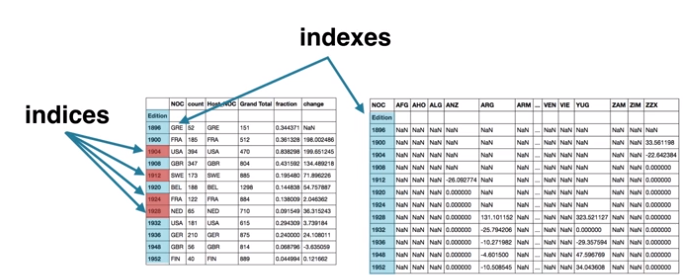

#### Importing Weather Data
To start, let's load temperature data from Pittsburgh, PA from 2013. Notice that the w_mean DataFrame is sorted alphabetically and the w_max DataFrame is sorted chronologically.

In [42]:
import pandas as pd

w_mean = pd.read_csv('c:\\datacamp\\04-MergingDataFrameswithPandas\\data\\w_mean.csv', index_col='Month')
w_max = pd.read_csv('c:\\datacamp\\04-MergingDataFrameswithPandas\\data\\w_max.csv', index_col='Month')
print(w_mean)
print(w_max)

       Mean TemperatureF
Month                   
Apr            61.956044
Jan            32.133333
Jul            68.934783
Oct            43.434783
       Max TemperatureF
Month                  
Jan                  68
Apr                  89
Jul                  91
Oct                  84


The DataFrames' indexes are accessed with the .index attribute

In [43]:
w_mean.index

Index(['Apr', 'Jan', 'Jul', 'Oct'], dtype='object', name='Month')

In [44]:
w_max.index

Index(['Jan', 'Apr', 'Jul', 'Oct'], dtype='object', name='Month')

In [45]:
print(type(w_mean.index))

<class 'pandas.core.indexes.base.Index'>


#### Using .reindex()

A list can be created to impose a deliberate ordering on the index labels of w_mean. Using the DataFrame .reindex() method we can create a new DataFrame, w_mean2, using the same data, but with an index ordering according to the input list ordered. 

In [46]:
ordered = ['Jan', 'Apr', 'Jul', 'Oct']
w_mean2 = w_mean.reindex(ordered)
w_mean2

,Mean TemperatureF
Month,
Jan,32.133333
Apr,61.956044
Jul,68.934783
Oct,43.434783


#### Using .sort_index()

The original, alphabetical order of the DataFrame index can be recovered with the .sort_index() method.

In [47]:
w_mean2.sort_index()

,Mean TemperatureF
Month,
Apr,61.956044
Jan,32.133333
Jul,68.934783
Oct,43.434783


#### Reindex from a DataFrame Index

The input argument for the .reindex() method can also be another DataFrame. This option means that the index order does not need to be created manually or that the index needs to be sorted.

In [48]:
w_mean.reindex(w_max.index)

,Mean TemperatureF
Month,
Jan,32.133333
Apr,61.956044
Jul,68.934783
Oct,43.434783


#### Reindexing with Missing Labels

The specific index label provided to the .reindex() method are important. If we invoke .reindex() method again containing a label within the provided list that is NOT in the original DataFrame, the new row is inserted and filled with the null value or NaN. 

In [49]:
w_mean3 = w_mean.reindex(['Jan', 'Apr', 'Dec'])
print(w_mean3)

       Mean TemperatureF
Month                   
Jan            32.133333
Apr            61.956044
Dec                  NaN


#### Reindex from a DataFrame Index

.reindex() method can also be used to see where DataFrame rows overlap. In the example below we reindex w_max with the index from w_main3 and it shows that w_max does not have a row labeled Dec either. 

Using the .dropna() method will drop all the rows in which null values occur.

In [50]:
w_max.reindex(w_mean3.index)

,Max TemperatureF
Month,
Jan,68.0
Apr,89.0
Dec,NaN


In [51]:
w_max.reindex(w_mean3.index).dropna()

,Max TemperatureF
Month,
Jan,68.0
Apr,89.0


### Exercise 2

#### Sorting DataFrame with the Index & columns
It is often useful to rearrange the sequence of the rows of a DataFrame by sorting. You don't have to implement these yourself; the principal methods for doing this are .sort_index() and .sort_values().

In this exercise, you'll use these methods with a DataFrame of temperature values indexed by month names. You'll sort the rows alphabetically using the Index and numerically using a column. Notice, for this data, the original ordering is probably most useful and intuitive: the purpose here is for you to understand what the sorting methods do.

__Instructions:__
 * Read 'monthly_max_temp.csv' into a DataFrame called weather1 with 'Month' as the index.
 * Sort the index of weather1 in alphabetical order using the .sort_index() method and store the result in weather2.
 * Sort the index of weather1 in reverse alphabetical order by specifying the additional keyword argument ascending=False inside .sort_index().
 * Use the .sort_values() method to sort weather1 in increasing numerical order according to the values of the column 'Max TemperatureF'.

In [79]:
# Import pandas
import pandas as pd

# Read 'monthly_max_temp.csv' into a DataFrame: weather1
weather1 = pd.read_csv('c:\\datacamp\\04-MergingDataFrameswithPandas\\data\\monthly_max_temp.csv', index_col = 'Month')

# Print the head of weather1
print(weather1.head())

# Sort the index of weather1 in alphabetical order: weather2
weather2 = weather1.sort_index(ascending = True)

# Print the head of weather2
print(weather2.head())

# Sort the index of weather1 in reverse alphabetical order: weather3
weather3 = weather1.sort_index(ascending = False)

# Print the head of weather3
print(weather3.head())

# Sort weather1 numerically using the values of 'Max TemperatureF': weather4
weather4 = weather1.sort_values(['Max TemperatureF'])

# Print the head of weather4
print(weather4.head())

       Unnamed: 0  Max TemperatureF
Month                              
Jan             0                68
Feb             1                60
Mar             2                68
Apr             3                84
May             4                88
       Unnamed: 0  Max TemperatureF
Month                              
Apr             3                84
Aug             7                86
Dec            11                68
Feb             1                60
Jan             0                68
       Unnamed: 0  Max TemperatureF
Month                              
Sep             8                90
Oct             9                84
Nov            10                72
May             4                88
Mar             2                68
       Unnamed: 0  Max TemperatureF
Month                              
Feb             1                60
Jan             0                68
Mar             2                68
Dec            11                68
Nov            10           

#### Reindexing DataFrame from a list
Sorting methods are not the only way to change DataFrame Indexes. There is also the .reindex() method.

In this exercise, you'll reindex a DataFrame of quarterly-sampled mean temperature values to contain monthly samples (this is an example of upsampling or increasing the rate of samples, which you may recall from the pandas Foundations course).

The original data has the first month's abbreviation of the quarter (three-month interval) on the Index, namely Apr, Jan, Jul, and Oct. This data has been loaded into a DataFrame called weather1 and has been printed in its entirety in the IPython Shell. Notice it has only four rows (corresponding to the first month of each quarter) and that the rows are not sorted chronologically.

You'll initially use a list of all twelve month abbreviations and subsequently apply the .ffill() method to forward-fill the null entries when upsampling. This list of month abbreviations has been pre-loaded as year.

__Instructions:__
 * Reorder the rows of weather1 using the .reindex() method with the list year as the argument, which contains the abbreviations for each month.
 * Reorder the rows of weather1 just as you did above, this time chaining the .ffill() method to replace the null values with the last preceding non-null value.


In [67]:
# Import pandas
import pandas as pd

# Reindex weather1 using the list year: weather2
weather2 = weather1.reindex(year)

# Print weather2
print(weather2)

# Reindex weather1 using the list year with forward-fill: weather3
weather3 = weather1.reindex(year).ffill()

# Print weather3
print(weather3)

       Mean TemperatureF
Month                   
Jan            32.133333
Feb                  NaN
Mar                  NaN
Apr            61.956044
May                  NaN
June                 NaN
July                 NaN
Aug                  NaN
Sep                  NaN
Oct            43.434783
Nov                  NaN
Dec                  NaN
       Mean TemperatureF
Month                   
Jan            32.133333
Feb            32.133333
Mar            32.133333
Apr            61.956044
May            61.956044
June           61.956044
July           61.956044
Aug            61.956044
Sep            61.956044
Oct            43.434783
Nov            43.434783
Dec            43.434783


#### Reindexing using another DataFrame Index
Another common technique is to reindex a DataFrame using the Index of another DataFrame. The DataFrame .reindex() method can accept the Index of a DataFrame or Series as input. You can access the Index of a DataFrame with its .index attribute.

The Baby Names Dataset from data.gov summarizes counts of names (with genders) from births registered in the US since 1881. In this exercise, you will start with two baby-names DataFrames names_1981 and names_1881 loaded for you.

The DataFrames names_1981 and names_1881 both have a MultiIndex with levels name and gender giving unique labels to counts in each row.

As you can see by looking at their shapes, which have been printed in the IPython Shell, the DataFrame corresponding to 1981 births is much larger, reflecting the greater diversity of names in 1981 as compared to 1881.

Your job here is to use the DataFrame .reindex() and .dropna() methods to make a DataFrame common_names counting names from 1881 that were still popular in 1981.

__Instructions:__
 * Create a new DataFrame common_names by reindexing names_1981 using the index attribute of the DataFrame names_1881 of older names.
 * Print the shape of the new common_names DataFrame. This has been done for you. It should be the same as that of names_1881.
 * Drop the rows of common_names that have null counts using the .dropna() method. These rows correspond to names that fell out of fashion between 1881 & 1981.
 * Print the shape of the reassigned common_names DataFrame. This has been done for you, so hit 'Submit Answer' to see the result!

In [75]:
print('Shape of names_1981 DataFrame: ' + str(names_1981.shape))
print('Shape of names_1881 DataFrame: ' + str(names_1881.shape))

Shape of names_1981 DataFrame: (19455, 1)
Shape of names_1881 DataFrame: (1935, 1)


In [76]:
# Import pandas
import pandas as pd

# Reindex names_1981 with index of names_1881: common_names
common_names = names_1981.reindex(names_1881.index)

# Print shape of common_names
print(common_names.shape)

# Drop rows with null counts: common_names
common_names = common_names.dropna()

# Print shape of new common_names
print(common_names.shape)

(1935, 1)
(1587, 1)


Excellent work! It looks like 348 names fell out of fashion between 1881 and 1981!

### Arithmetic with Series & DataFrames

There are various arithmatic and mathmematical operations that can be done with Pandas Series and DataFrames. 

We can import the Pittsburgh weather data and index col = 'Date' option, as well as parse_dates = True option, we can set the Date column to be a DateTime object. This allows us to select the first week of July using the .loc slicer and select the Precipitation column that is stored in inches. 

In [81]:
import pandas as pd
weather = pd.read_csv('C:\\datacamp\\04-MergingDataFrameswithPandas\\data\\pittsburgh2013.csv',
                      index_col=['Date'], parse_dates = True)

weather.loc['2013-07-01':'2013-07-07', 'PrecipitationIn']

Date
2013-07-01    0.18
2013-07-02    0.14
2013-07-03    0.00
2013-07-04    0.25
2013-07-05    0.02
2013-07-06    0.06
2013-07-07    0.10
Name: PrecipitationIn, dtype: float64

#### Scalar Multiplication

To convert preciptation from in to cm, we can use the asterisk to multiple the series element wise by 2.54 to convert the value to cm.

In [82]:
weather.loc['2013-07-01':'2013-07-07', 'PrecipitationIn'] *2.54

Date
2013-07-01    0.4572
2013-07-02    0.3556
2013-07-03    0.0000
2013-07-04    0.6350
2013-07-05    0.0508
2013-07-06    0.1524
2013-07-07    0.2540
Name: PrecipitationIn, dtype: float64

#### Relative Temperature Range

Let's find the percentage variation in temperature for the first week in July. That is the daily minimum and the daily maximum temperatures expressed as a percentage of the daily mean temperature, or: Min TemperatureF/Mean TemperatureF * 100 and the samefor the Max TemperatureF.

First, slice and Min and Max TemperatureF as a DataFrame week1_range and then slice the Mean TemperatureF as a Series called week1_mean.

In [84]:
week1_range = weather.loc['2013-07-01':'2013-07-07',['Min TemperatureF', 'Max TemperatureF']]
print(week1_range)

week1_mean = weather.loc['2013-07-01':'2013-07-07','Mean TemperatureF']
print(week1_mean)

            Min TemperatureF  Max TemperatureF
Date                                          
2013-07-01                66                79
2013-07-02                66                84
2013-07-03                71                86
2013-07-04                70                86
2013-07-05                69                86
2013-07-06                70                89
2013-07-07                70                77
Date
2013-07-01    72
2013-07-02    74
2013-07-03    78
2013-07-04    77
2013-07-05    76
2013-07-06    78
2013-07-07    72
Name: Mean TemperatureF, dtype: int64


Dividing the DataFrame week1_range by the Series week1_mean doesn't work. The column labels don't match, so the result has all Null values. 

In [85]:
week1_range/week1_mean

,2013-07-01 00:00:00,2013-07-02 00:00:00,2013-07-03 00:00:00,2013-07-04 00:00:00,2013-07-05 00:00:00,2013-07-06 00:00:00,2013-07-07 00:00:00,Max TemperatureF,Min TemperatureF
Date,,,,,,,,,
2013-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Instead, the DataFrame .divide() method is used with the option axis = 'rows'. The .divide() method provides more fine grained control rather than the slash(/) division operator. The .divide() method broadcasts the series week1_mean across each row of week1_range to produce the desired ratios. We can see the temperature ranges at most 10% from the mean. 

In [86]:
week1_range.divide(week1_mean, axis = 'rows')

,Min TemperatureF,Max TemperatureF
Date,,
2013-07-01,0.916667,1.097222
2013-07-02,0.891892,1.135135
2013-07-03,0.910256,1.102564
2013-07-04,0.909091,1.116883
2013-07-05,0.907895,1.131579
2013-07-06,0.897436,1.141026
2013-07-07,0.972222,1.069444


### Percentage Changes

A related calculation is the compute the percentage change along a time series. We do this by substracting the previous day's value from the current day's value and dividing by the previous day's value. The .pct_change() method does this exact calculation. If you also multiple the result by 100, you get the percentage value.

In [87]:
week1_mean.pct_change() * 100

Date
2013-07-01         NaN
2013-07-02    2.777778
2013-07-03    5.405405
2013-07-04   -1.282051
2013-07-05   -1.298701
2013-07-06    2.631579
2013-07-07   -7.692308
Name: Mean TemperatureF, dtype: float64

When the DataFrames have non-aligned indexes, mathematical and arithmetic calculations can still occur. Let's look at the Olympic medal data of the top 5 winning countries. 

In [90]:
bronze = pd.read_csv('c:\\datacamp\\04-MergingDataFrameswithPandas\\data\\bronze_top5.csv', index_col=0)
print(bronze)

silver = pd.read_csv('c:\\datacamp\\04-MergingDataFrameswithPandas\\data\\silver_top5.csv', index_col=0)
print (silver)

gold = pd.read_csv('c:\\datacamp\\04-MergingDataFrameswithPandas\\data\\gold_top5.csv', index_col=0)
print(gold)

                 Total
Country               
United States   1052.0
Soviet Union     584.0
United Kingdom   505.0
France           475.0
Germany          454.0
                 Total
Country               
United States   1195.0
Soviet Union     627.0
United Kingdom   591.0
France           461.0
Italy            394.0
                 Total
Country               
United States   2088.0
Soviet Union     838.0
United Kingdom   498.0
Italy            460.0
Germany          407.0


All three datasets have the same indices for the first three rows: United States, Soviet Union, United Kingdom. By contrast, the next two rows are either France, Germany or Italy. 

If we want to compute the total medals awarded to each country, we would start by adding bronze + silver. These are two series of 5 rows and get back a Series with 6 rows. The index of the sum is the union of the row indices from the original two series. 

In [91]:
bronze + silver

,Total
Country,
France,936.0
Germany,NaN
Italy,NaN
Soviet Union,1211.0
United Kingdom,1096.0
United States,2247.0


Arithemetic operations on Pandas Series are carried out for rows with common index values. Because Germany is not in Silver and Italy is not in Bronze, they show as having Null values.

#### Using the .add() method

The same result will be returned using the .add() method.

In [92]:
bronze.add(silver)

,Total
Country,
France,936.0
Germany,NaN
Italy,NaN
Soviet Union,1211.0
United Kingdom,1096.0
United States,2247.0


#### Using a fill_value Option

The default value is NaN when sum and rows fail to align. By adding the option fill_value = 0 when using the .add() method. Now if a value does not exist in one Series but it does in the other, the fill value is no longer Null but a 0 that can be added to the values found in the other Series. Just like the .divide() method is more flexible than using the slash operator, the .add() method is more flexible than using the plus operator.

In [93]:
bronze.add(silver, fill_value =0)

,Total
Country,
France,936.0
Germany,454.0
Italy,394.0
Soviet Union,1211.0
United Kingdom,1096.0
United States,2247.0


#### Adding bronze, silver, gold

Adding all 3 together using the plus operator results in 6 rows in the series, but only 3 non-Nulls.

In [94]:
bronze+silver+gold

,Total
Country,
France,NaN
Germany,NaN
Italy,NaN
Soviet Union,2049.0
United Kingdom,1594.0
United States,4335.0


#### Chaining .add()

Multiple method calls can be chained together.

In [95]:
bronze.add(silver, fill_value = 0).add(gold, fill_value = 0)

,Total
Country,
France,936.0
Germany,861.0
Italy,854.0
Soviet Union,2049.0
United Kingdom,1594.0
United States,4335.0


### Exercise 3

#### Broadcasting in arithmetic formulas
In this exercise, you'll work with weather data pulled from wunderground.com. The DataFrame weather has been pre-loaded along with pandas as pd. It has 365 rows (observed each day of the year 2013 in Pittsburgh, PA) and 22 columns reflecting different weather measurements each day.

You'll subset a collection of columns related to temperature measurements in degrees Fahrenheit, convert them to degrees Celsius, and relabel the columns of the new DataFrame to reflect the change of units.

Remember, ordinary arithmetic operators (like +, -, *, and /) broadcast scalar values to conforming DataFrames when combining scalars & DataFrames in arithmetic expressions. Broadcasting also works with pandas Series and NumPy arrays.

__Instructions:__
 * Create a new DataFrame temps_f by extracting the columns 'Min TemperatureF', 'Mean TemperatureF', & 'Max TemperatureF' from weather as a new DataFrame temps_f. To do this, pass the relevant columns as a list to weather[].
 * Create a new DataFrame temps_c from temps_f using the formula (temps_f - 32) * 5/9.
 * Rename the columns of temps_c to replace 'F' with 'C' using the .str.replace('F', 'C') method on temps_c.columns.
 * Print the first 5 rows of DataFrame temps_c. This has been done for you, so hit 'Submit Answer' to see the result!

In [98]:
# Extract selected columns from weather as new DataFrame: temps_f
temps_f = weather[['Min TemperatureF','Mean TemperatureF', 'Max TemperatureF']]

# Convert temps_f to celsius: temps_c
temps_c = (temps_f - 32) *5/9

# Rename 'F' in column names with 'C': temps_c.columns
temps_c.columns = temps_c.columns.str.replace('F', 'C')

# Print first 5 rows of temps_c
print(temps_c.head())

            Min TemperatureC  Mean TemperatureC  Max TemperatureC
Date                                                             
2013-01-01         -6.111111          -2.222222          0.000000
2013-01-02         -8.333333          -6.111111         -3.888889
2013-01-03         -8.888889          -4.444444          0.000000
2013-01-04         -2.777778          -2.222222         -1.111111
2013-01-05         -3.888889          -1.111111          1.111111


#### Computing percentage growth of GDP
Your job in this exercise is to compute the yearly percent-change of US GDP (Gross Domestic Product) since 2008.

The data has been obtained from the Federal Reserve Bank of St. Louis and is available in the file GDP.csv, which contains quarterly data; you will resample it to annual sampling and then compute the annual growth of GDP. For a refresher on resampling, check out the relevant material from pandas Foundations.

__Instructions:__
 * Read the file 'GDP.csv' into a DataFrame called gdp, using parse_dates=True and index_col='DATE'.
 * Create a DataFrame post2008 by slicing gdp such that it comprises all rows from 2008 onward.
 * Print the last 8 rows of the slice post2008. This has been done for you. This data has quarterly frequency so the indices are separated by three-month intervals.
 * Create the DataFrame yearly by resampling the slice post2008 by year. Remember, you need to chain .resample() (using the alias 'A' for annual frequency) with some kind of aggregation; you will use the aggregation method .last() to select the last element when resampling.
 * Compute the percentage growth of the resampled DataFrame yearly with .pct_change() * 100.

In [104]:
import pandas as pd

# Read 'GDP.csv' into a DataFrame: gdp
gdp = pd.read_csv('C:\\datacamp\\04-MergingDataFrameswithPandas\\data\\gdp_usa.csv', parse_dates=True, index_col='DATE')

# Slice all the gdp data from 2008 onward: post2008
post2008 = gdp.loc["2008":]

# Print the last 8 rows of post2008
print(post2008.tail(8))

# Resample post2008 by year, keeping last(): yearly
yearly = post2008.resample('A').last()

# Print yearly
print(yearly)

# Compute percentage growth of yearly: yearly['growth']
yearly['growth'] = yearly.pct_change()*100

# Print yearly again
print(yearly)

              VALUE
DATE               
2014-07-01  17569.4
2014-10-01  17692.2
2015-01-01  17783.6
2015-04-01  17998.3
2015-07-01  18141.9
2015-10-01  18222.8
2016-01-01  18281.6
2016-04-01  18436.5
              VALUE
DATE               
2008-12-31  14549.9
2009-12-31  14566.5
2010-12-31  15230.2
2011-12-31  15785.3
2012-12-31  16297.3
2013-12-31  16999.9
2014-12-31  17692.2
2015-12-31  18222.8
2016-12-31  18436.5
              VALUE    growth
DATE                         
2008-12-31  14549.9       NaN
2009-12-31  14566.5  0.114090
2010-12-31  15230.2  4.556345
2011-12-31  15785.3  3.644732
2012-12-31  16297.3  3.243524
2013-12-31  16999.9  4.311144
2014-12-31  17692.2  4.072377
2015-12-31  18222.8  2.999062
2016-12-31  18436.5  1.172707


#### Converting currency of stocks
In this exercise, stock prices in US Dollars for the S&P 500 in 2015 have been obtained from Yahoo Finance. The files sp500.csv for sp500 and exchange.csv for the exchange rates are both provided to you.

Using the daily exchange rate to Pounds Sterling, your task is to convert both the Open and Close column prices.

__Instructions:__
 * Read the DataFrames sp500 & exchange from the files 'sp500.csv' & 'exchange.csv' respectively..
 * Use parse_dates=True and index_col='Date'.
 * Extract the columns 'Open' & 'Close' from the DataFrame sp500 as a new DataFrame dollars and print the first 5 rows.
 * Construct a new DataFrame pounds by converting US dollars to British pounds. You'll use the .multiply() method of dollars with exchange['GBP/USD'] and axis='rows'
 * Print the first 5 rows of the new DataFrame pounds. This has been done for you, so hit 'Submit Answer' to see the results!.


In [103]:
gdp

,DATE,VALUE
0,1947-01-01,243.1
1,1947-04-01,246.3
2,1947-07-01,250.1
3,1947-10-01,260.3
4,1948-01-01,266.2
...,...,...
273,2015-04-01,17998.3
274,2015-07-01,18141.9
275,2015-10-01,18222.8
276,2016-01-01,18281.6
